# Data Science Research Method-- Report 2 
### Kittiworawat Thanapon
### 22115632

## Preface

This report is based on the dataset from PAMAP 2 (Physical Activity Monitoring Data Set) from UC Irvine Machine Learning Resitory. Data was yielded by setting up 5 equipments: 3 Colibri wireless IMUs (inertial measurement units; wrist on the dominant arm, chest and on the dominant side's ankle), HR-monitor and a companion unit. There are 9 test subjects, one of them are female and the rest are men. Test subjects are behested to follow a protocol below. 

| Activity    | Duration (Mins)   |
| ----------- | ----------------- |
| Lie   | 3 |
| Sit   | 3 |
| Stand | 3 |
| Iron  | 3 |
| Break | 1 |
| Vacuum  | 3 |
| Break | 1 |
| Ascend Stairs 1 | 1 |
| Break | 2 |
| Descend Stairs 2 | 1 |
| Break | 1 |
| Ascend Stairs 2 | 1 |
| Descend Stairs 2 | 1 |
| Break | 2 |
| Normal Walk | 3 |
| Break | 1 |
| Nordic Walk | 3 |
| Break | 1 |
| Cycle | 3 |
| Break | 1 |
| Run | 3 |
| Break | 2 |
| Rope Jump | 2 |

In the meantime, data collection contains NaNs (Not a Numbers) due to following reasons: data dropping due to using wireless sensors, problem with hardware setup and different sampling frequency from IMUs and HR Monitor.

|  |  | List of Columns |  |  |  |
---|--|-----------------|----|----|----|
| Time Stamp | Activity ID | Heart Rate | IMU Hand | IMU Chest | IMU Ankle |
| Temperature | 3D-acceleration Data Scale +-16g | 3D-acceleration Data Scale +-6g | 3d-gyroscope Data | 3d-magnometer Data | Orientation |

The goal of this test is to develop hardware and/or software which can determine the amount and type of physical activity carried out by an individual and determine what actionable insights can be derived from this dataset. 

## Introduction

The data from test subjects are [available to download here!](http://archive.ics.uci.edu/ml/machine-learning-databases/00231/) There are 9 files in .dat: subject101, subject 102, subject103, subject104, subject105, subject106, subject107, subject108 and subject 109, which contains data for individual test subject. In addition, there is a data about test subject in subjactinformation (PDF) file, as well as other corresponding data such as DataCollectionProtocol, DescriptionOfActivities, PerformedActivitiesSummary and readme. In which all of these files mentioned above are availble to download in the same hyperlink as data of individual test subjects. These files are containing a lot of NaNs and are needed to be munging and cleaning before we can start to develop insight from this dataset. 

In this report, it is divided into 5 parts: preparatory tasks, data cleaning, hypotheses testing, data modelling and decision. In preparatory tasks, there will be installation of additional libraries, import libraries, check and verify the installation as well as determine file path. As mentioned in previous paragraph that this data contained a lot of NaNs which this error occured due to reasons mentioned above, however, data munging and cleaning will be done in this part. Next, 2 hypothses will be tested. Namely, the first hypothesis testing will be tested to see if the mean heart rate collected from hand, chest and ankle will be lower in light to moderate activities comparing to mean heart rate from vigorous activity, whereas, the second hypothesis testing is set to test the correlation between heart rate and temperature. For data modelling, logistic regression will be carried out to conduct the model to see if given a series of information without telling what activity it is then how accurate it can predict the activity by other data. Lastly, decision, .

## Preparatory Tasks

Before the data can be processed, there are preparatory needed. In order to explore, visualise and analyse this data, a few additional libraries will be installed. 

In [54]:
!pip install tabula #tabula installer
!pip install install-jdk
!python -m pip install mitoinstaller #mitosheet installer
!python -m mitoinstaller install
!pip install --upgrade pywin32==225
!pip install tabulate #tabulate installer

Starting install...
Create mito user
Upgrading mitoinstaller
Checking dependencies
Installing mitosheet3
Create import mito startup file
Creating a Mitosheet starter notebook
Start JupyterLab
Finish Installation

----------------------------------------------------------------------------
Mito has finished installing

Please shut down the currently running JupyterLab and relaunch it to enable Mito

Then render a mitosheet following the instructions here: https://docs.trymito.io/how-to/creating-a-mitosheet
----------------------------------------------------------------------------
Requirement already up-to-date: pywin32==225 in c:\users\tk\anaconda3\lib\site-packages (225)


After the installation is processed, we will verify of the libraries are added correctly and are up-to-date.

In [55]:
!pip list -v #see installed versions

Package                            Version             Location                                Installer
---------------------------------- ------------------- --------------------------------------- ---------
alabaster                          0.7.12              c:\users\tk\anaconda3\lib\site-packages conda
anaconda-client                    1.7.2               c:\users\tk\anaconda3\lib\site-packages pip
anaconda-navigator                 1.10.0              c:\users\tk\anaconda3\lib\site-packages
anaconda-project                   0.8.3               c:\users\tk\anaconda3\lib\site-packages conda
analytics-python                   1.4.0               c:\users\tk\anaconda3\lib\site-packages pip
anyio                              3.4.0               c:\users\tk\anaconda3\lib\site-packages pip
argh                               0.26.2              c:\users\tk\anaconda3\lib\site-packages
argon2-cffi                        20.1.0              c:\users\tk\anaconda3\lib\site-packages pip
as

Additional libraries are installed and ready to be defined. In this cell, existing libraries as well as additional libraries will be import to this jupyternotebook. 

In [39]:
import os
import pdb
import tabula
import math
from IPython.display import display
from matplotlib import rcParams
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from numpy.random import randn
from numpy.random import seed
from tabulate import tabulate
import numpy as np
import random
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
from statsmodels.stats import weightstats as stests
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.linear_model import  LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.metrics import log_loss
os.chdir("/Users/TK/Desktop/MSc. Fintech, Investment and Risk Analyst/Data Science Research Methods/Assessment Material/Report 2/Report_2.jupyternb")
import mitosheet
import warnings
warnings.filterwarnings("ignore") 

## Data Cleaning

Before we can start data munging and cleaning, we will need to define columns name first. For activity name, we will use define activity name and activity id accordingly.

| Activity ID | Activity Name |
|-------------|---------------|
| 0 | Other (transient activities) |
| 1 | Lying |
| 2 | Sitting |
| 3 | Standing |
| 4 | Walking |
| 5 | Running |
| 6 | Cycling |
| 7 | Nordic Walking |
| 9 | Watching TV |
| 10 | Computer Work |
| 11 | Car Driving |
| 12 | Ascending Stairs |
| 13 | Descending Stairs |
| 16 | Vacuum Cleaning |
| 17 | Ironing |
| 18 | Folding Laundry |
| 19 | House Cleaning |
| 20 | Playing Soccer |
| 24 | Rope Jumping |

Then, we will further define the columns associated with IMUs. 

In [2]:
def generate_activity_names():
    activity_name = {}
    activity_name[0] = 'other (transient activities)'
    activity_name[1] = 'lying'
    activity_name[2] = 'sitting'
    activity_name[3] = 'standing'
    activity_name[4] = 'walking'
    activity_name[5] = 'running'
    activity_name[6] = 'cycling'
    activity_name[7] = 'Nordic_walking'
    activity_name[9] = 'watching_TV'
    activity_name[10] = 'computer_work'
    activity_name[11] = 'car driving'
    activity_name[12] = 'ascending_stairs'
    activity_name[13] = 'descending_stairs'
    activity_name[16] = 'vacuum_cleaning'
    activity_name[17] = 'ironing'
    activity_name[18] = 'folding_laundry'
    activity_name[19] = 'house_cleaning'
    activity_name[20] = 'playing_soccer'
    activity_name[24] = 'rope_jumping'
    return activity_name

def generate_three_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'  
    return [x, y, z]

def generate_four_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    w = name +'_w'
    return [x, y, z, w]

def generate_cols_IMU(name):
    temp = name+'_Temp'
    output = [temp]

    #accelerometer 16g
    acceleration16 = name+'_a_16'
    acceleration16 = generate_three_IMU(acceleration16)
    output.extend(acceleration16)

    #accelerometer 6g
    acceleration6 = name+'_a_6'
    acceleration6 = generate_three_IMU(acceleration6)
    output.extend(acceleration6)

    #gyposcope 
    gyroscope = name+'_Gy'
    gyroscope = generate_three_IMU(gyroscope)
    output.extend(gyroscope)

    #magnometer
    magnometer = name+'_Mag'
    magnometer = generate_three_IMU(magnometer)
    output.extend(magnometer)
 
    #orientation
    orientation = name+'_Or'
    orientation = generate_four_IMU(orientation)
    output.extend(orientation)
    return output

def load_IMU():
    output = ['time_stamp','activity_id', 'heart_rate']
    hand = 'hand'
    hand = generate_cols_IMU(hand)
    output.extend(hand)
    chest = 'chest'
    chest = generate_cols_IMU(chest)
    output.extend(chest)
    ankle = 'ankle'
    ankle = generate_cols_IMU(ankle)
    output.extend(ankle)
    return output

After designated the file path for this assessment, we will detemine the data files. The files which contained data of test subjects are subject101, subject102, subject103, subject104, subject105, subject106, subject107, subject108 and subject 109.

In [3]:
dataCollection = pd.DataFrame()
list_of_files = [f'subject{fileno}.dat' for fileno in range(101,110)]
columns = load_IMU()
for file in list_of_files:
    procData = pd.read_table(file, header = None, sep = '\s+')
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    dataCollection = dataCollection.append(procData, ignore_index = True)

dataCollection.reset_index(drop = True, inplace = True)
dataCollection.head() 
dataCollection.to_pickle("pamap2_named.pkl")

dataCollection.head()

,time_stamp,activity_id,heart_rate,hand_Temp,hand_a_16_x,hand_a_16_y,hand_a_16_z,hand_a_6_x,hand_a_6_y,hand_a_6_z,...,ankle_Gy_y,ankle_Gy_z,ankle_Mag_x,ankle_Mag_y,ankle_Mag_z,ankle_Or_x,ankle_Or_y,ankle_Or_z,ankle_Or_w,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


We will then drop the column with accelerometer of 6g due to high impacts caused by certain movements, for example runiing et cetera. Therefore, the mentioned activities gets saturated, so we will disregard data from accelerometer 6g and keep the ones from 16g. In the meantime, we will, also, drop the column associated with orientation because it is invalid in this data collection. The table below shows the data after we get rid off Accelerometer 6g and Orientation.

In [4]:
new_dataCollection = dataCollection.drop(labels = None, axis = 1, index = None, columns = ["hand_Or_x", "hand_Or_y", "hand_Or_z", "hand_Or_w",
                                         "chest_Or_x", "chest_Or_y", "chest_Or_z", "chest_Or_w", "ankle_Or_x", "ankle_Or_y", "ankle_Or_z",
                                         "ankle_Or_w", "hand_a_6_x", "hand_a_6_y", "hand_a_6_z", "chest_a_6_x", "chest_a_6_y", "chest_a_6_z",
                                         "ankle_a_6_x", "ankle_a_6_y", "ankle_a_6_z"], level = None, inplace = False, errors = 'raise')
new_dataCollection.head() #df that got rid of columns above

,time_stamp,activity_id,heart_rate,hand_Temp,hand_a_16_x,hand_a_16_y,hand_a_16_z,hand_Gy_x,hand_Gy_y,hand_Gy_z,...,ankle_a_16_x,ankle_a_16_y,ankle_a_16_z,ankle_Gy_x,ankle_Gy_y,ankle_Gy_z,ankle_Mag_x,ankle_Mag_y,ankle_Mag_z,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,...,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,-0.024413,0.047758,0.006474,...,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,-0.057976,0.032574,-0.006988,...,9.58944,-1.73276,0.092914,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,-0.002352,0.032810,-0.003747,...,9.58814,-1.77040,0.054545,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,0.012269,0.018305,-0.053325,...,9.69771,-1.65625,-0.060809,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1


We would like to see the count of rows for each activity.

In [5]:
new_dataCollection.activity_id.value_counts() #see frequency of activity data in df

0     929661
4     238761
17    238690
1     192523
3     189931
7     188107
2     185188
16    175353
6     164600
12    117216
13    104944
5      98199
24     49360
Name: activity_id, dtype: int64

We will drop activity_ID[0] (Other (transient activities)) because this data mainly covers transient activities between performing activities. Data from activity identification are dropped because it can mislead readers, and so we construct new column to replace activity ID. This column is called activity name. In which it is a clearer label of activity ID.

In [6]:
act = generate_activity_names()
new_dataCollection["activity_name"] = new_dataCollection.activity_id.apply(lambda x: act[x]) #generate new column called activity name
new_dataCollection = new_dataCollection[new_dataCollection.activity_id!=0]
new_dataCollection = new_dataCollection.drop(labels = None, axis = 1, index = None, columns = ["activity_id"], level = None, 
                                             inplace = False, errors = 'raise')
cleaned_data = new_dataCollection[new_dataCollection.subject_id != 9]
cleaned_data.head()

,time_stamp,heart_rate,hand_Temp,hand_a_16_x,hand_a_16_y,hand_a_16_z,hand_Gy_x,hand_Gy_y,hand_Gy_z,hand_Mag_x,...,ankle_a_16_y,ankle_a_16_z,ankle_Gy_x,ankle_Gy_y,ankle_Gy_z,ankle_Mag_x,ankle_Mag_y,ankle_Mag_z,subject_id,activity_name
2928,37.66,NaN,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,8.93200,...,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1,lying
2929,37.67,NaN,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,9.58300,...,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1,lying
2930,37.68,NaN,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,9.05516,...,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1,lying
2931,37.69,NaN,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,9.92698,...,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1,lying
2932,37.70,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,9.15626,...,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1,lying


NaN data will not be removed now because it could affect the result of hypothesis, therefore, we will do it later. Plus, now, we will be reordering the columns to improve readability of this dataset.

In [7]:
left_column = ["subject_id", "activity_name", "heart_rate"] #reorganised data file by reordering the column
right_column = [i for i in cleaned_data.columns if i not in left_column]
organised_data = cleaned_data.loc[0: , left_column + right_column]

organised_data.head()

,subject_id,activity_name,heart_rate,time_stamp,hand_Temp,hand_a_16_x,hand_a_16_y,hand_a_16_z,hand_Gy_x,hand_Gy_y,...,ankle_Temp,ankle_a_16_x,ankle_a_16_y,ankle_a_16_z,ankle_Gy_x,ankle_Gy_y,ankle_Gy_z,ankle_Mag_x,ankle_Mag_y,ankle_Mag_z
2928,1,lying,NaN,37.66,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,...,30.75,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696
2929,1,lying,NaN,37.67,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,...,30.75,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656
2930,1,lying,NaN,37.68,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,...,30.75,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119
2931,1,lying,NaN,37.69,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,...,30.75,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799
2932,1,lying,100.0,37.70,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,...,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847


## Exploratory Data Analysis

Exploratory data analysis is the analysis and investigation of data sets and summarize their main characteristics, often employing data visualization methods. It allows data scientist to discover patterns, spot anomalies, test a hypothesis, or check assumptions and provides a better understanding of data set variables and the relationships between them. Before diving into exploratory analysis part, we will see descriptive statistic of the dataset.

In [8]:
organised_data.describe(include = "all") #descriptive statistics of df

,subject_id,activity_name,heart_rate,time_stamp,hand_Temp,hand_a_16_x,hand_a_16_y,hand_a_16_z,hand_Gy_x,hand_Gy_y,...,ankle_Temp,ankle_a_16_x,ankle_a_16_y,ankle_a_16_z,ankle_Gy_x,ankle_Gy_y,ankle_Gy_z,ankle_Mag_x,ankle_Mag_y,ankle_Mag_z
count,1.936481e+06,1936481,176823.00000,1.936481e+06,1.925359e+06,1.925359e+06,1.925359e+06,1.925359e+06,1.925359e+06,1.925359e+06,...,1.927977e+06,1.927977e+06,1.927977e+06,1.927977e+06,1.927977e+06,1.927977e+06,1.927977e+06,1.927977e+06,1.927977e+06,1.927977e+06
unique,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,238761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.551755e+00,NaN,107.33266,1.710621e+03,3.278310e+01,-4.952301e+00,3.562649e+00,3.625346e+00,-4.170880e-04,3.982970e-02,...,3.372063e+01,9.404155e+00,-1.603379e-01,-2.589638e+00,1.060827e-02,-3.685487e-02,7.704590e-03,-3.155292e+01,1.493799e+00,1.726292e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,1.000000e+00,NaN,57.00000,3.766000e+01,2.750000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-2.780440e+01,-1.339040e+01,...,3.000000e+01,-1.550680e+02,-1.574430e+02,-1.589260e+02,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02
25%,2.000000e+00,NaN,86.00000,7.505300e+02,3.168750e+01,-8.961145e+00,1.052740e+00,1.172960e+00,-3.758100e-01,-2.211770e-01,...,3.300000e+01,8.436120e+00,-2.173620e+00,-3.809910e+00,-2.050010e-01,-1.054600e-01,-4.351680e-01,-4.170880e+01,-1.227600e+01,3.697650e+00
50%,5.000000e+00,NaN,104.00000,1.485860e+03,3.318750e+01,-5.445170e+00,3.520450e+00,3.447540e+00,-6.130650e-03,5.873380e-03,...,3.406250e+01,9.538330e+00,-2.913720e-01,-2.419140e+00,4.665120e-03,-3.977480e-03,-2.261990e-03,-3.395320e+01,8.901090e-01,1.884270e+01
75%,7.000000e+00,NaN,124.00000,2.666810e+03,3.406250e+01,-9.638880e-01,6.439055e+00,6.544845e+00,3.295750e-01,2.635260e-01,...,3.450000e+01,1.028220e+01,1.773200e+00,-1.046740e+00,1.294870e-01,1.145690e-01,9.017510e-02,-1.778930e+01,1.791360e+01,3.128870e+01


Correlation of dataset excluding subject_id and time_stamp in heatmap.

<AxesSubplot:>

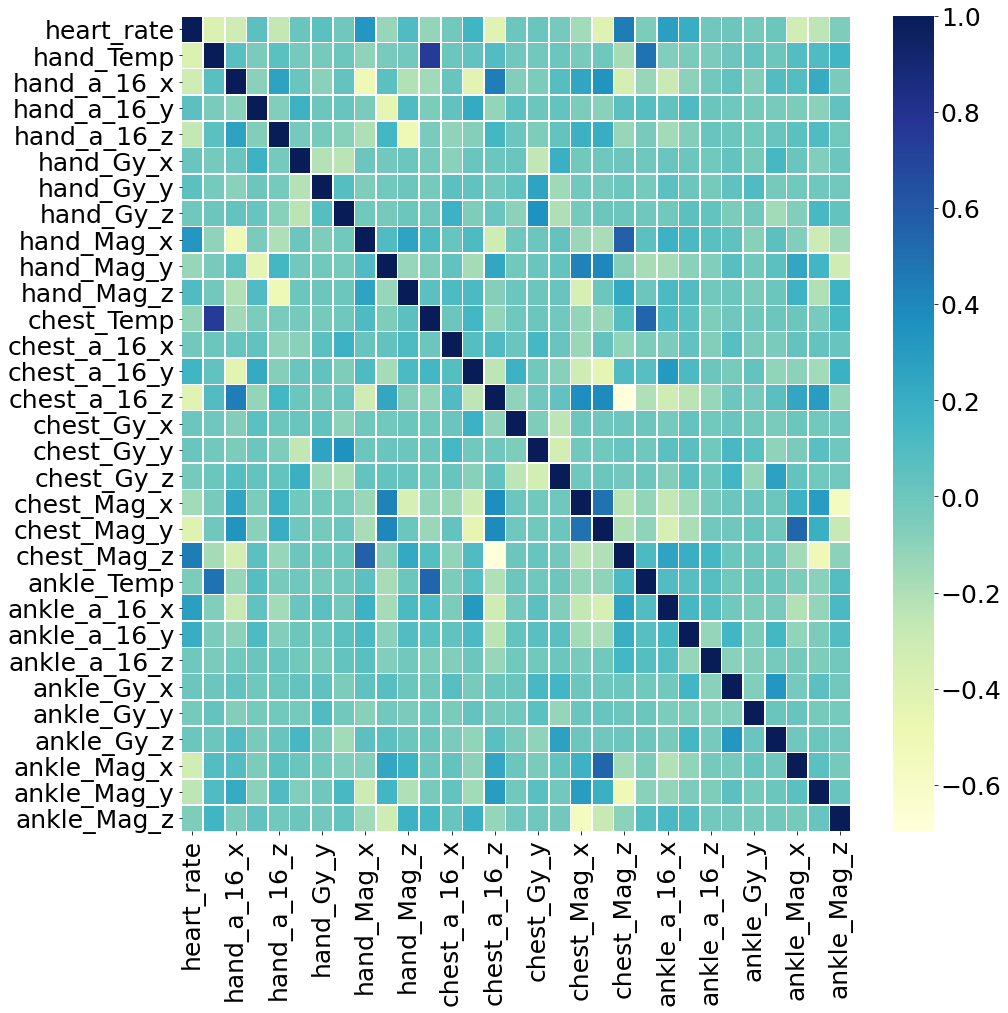

In [10]:
rcParams['figure.figsize'] = 15, 15
rcParams['font.size'] = 25
Corr = organised_data.drop(['subject_id','time_stamp'], axis = 1).corr()
sns.heatmap(Corr,  fmt = "g", linewidths = .5, cmap = "YlGnBu") #seaborn heatmap

After observing the correlation heatmap, for more detail, it will be a good idea if we observe the correlation matrix too.

In [11]:
cormat = Corr.corr()
round(cormat,4) #correlation matrix

,heart_rate,hand_Temp,hand_a_16_x,hand_a_16_y,hand_a_16_z,hand_Gy_x,hand_Gy_y,hand_Gy_z,hand_Mag_x,hand_Mag_y,...,ankle_Temp,ankle_a_16_x,ankle_a_16_y,ankle_a_16_z,ankle_Gy_x,ankle_Gy_y,ankle_Gy_z,ankle_Mag_x,ankle_Mag_y,ankle_Mag_z
heart_rate,1.0000,-0.5286,-0.7014,0.2605,-0.5657,0.0351,0.1364,0.0053,0.7023,-0.3970,...,0.0225,0.6746,0.5235,0.1190,0.0186,-0.0463,-0.0196,-0.6554,-0.6327,0.0670
hand_Temp,-0.5286,1.0000,0.1252,-0.1089,0.1407,-0.0704,-0.1164,-0.0341,-0.2617,-0.0931,...,0.6945,-0.1421,-0.1545,-0.1190,-0.0877,0.0360,-0.0578,0.1435,0.1853,0.2785
hand_a_16_x,-0.7014,0.1252,1.0000,-0.2798,0.6003,0.0198,-0.1677,0.0168,-0.8086,0.3843,...,-0.3278,-0.7113,-0.4284,-0.1221,0.0681,-0.0671,0.1638,0.4214,0.6345,-0.2224
hand_a_16_y,0.2605,-0.1089,-0.2798,1.0000,-0.2633,0.2717,-0.0199,-0.0127,0.0671,-0.7052,...,0.1626,0.2619,0.2739,0.0531,-0.0766,-0.0674,-0.1200,-0.2710,-0.3079,0.2332
hand_a_16_z,-0.5657,0.1407,0.6003,-0.2633,1.0000,-0.0224,-0.1116,-0.1407,-0.5340,0.3842,...,-0.1624,-0.5024,-0.3494,-0.0242,0.0056,0.0028,0.0674,0.2675,0.4288,-0.2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ankle_Gy_y,-0.0463,0.0360,-0.0671,-0.0674,0.0028,-0.1186,0.2068,-0.0034,-0.1167,-0.0162,...,0.0031,-0.0756,-0.1332,-0.1331,-0.1662,1.0000,-0.0664,0.0261,-0.0234,-0.0399
ankle_Gy_z,-0.0196,-0.0578,0.1638,-0.1200,0.0674,0.2940,-0.1964,-0.3995,0.0149,0.0948,...,-0.0820,-0.1311,0.1667,-0.1117,0.5457,-0.0664,1.0000,-0.0229,0.0027,-0.0785
ankle_Mag_x,-0.6554,0.1435,0.4214,-0.2710,0.2675,-0.0018,-0.1120,-0.1290,-0.3453,0.5230,...,-0.2306,-0.5988,-0.4573,-0.1407,-0.0873,0.0261,-0.0229,1.0000,0.3296,-0.2445
ankle_Mag_y,-0.6327,0.1853,0.6345,-0.3079,0.4288,-0.1498,-0.0255,0.1776,-0.6979,0.4106,...,-0.2710,-0.5219,-0.3689,-0.2037,0.0578,-0.0234,0.0027,0.3296,1.0000,-0.1448


Intensity estimation task 3 classes are deﬁned for this problem: activities of light, moderate and vigorous eﬀort.The ground truth for this rough intensity estimation is basedon the metabolic equivalent (MET) of the diﬀerent activities.Therefore, the 3 classes are deﬁned as following: lying, sit-ting, standing and ironing are regarded as activities of light eﬀort (< 3.0 METs); vacuum cleaning, descending stairs,normal walking, Nordic walking and cycling as activitiesof moderate eﬀort (3.0-6.0 METs); ascending stairs, run-ning and rope jumping as activities of vigorous eﬀort (> 6.0METs). However, in this exploratory data analysis, we will merge light effort activities and moderate effort activities together and call it light to moderate activity.

In [9]:
vigorous = ['ascending_stairs','running','rope_jumping'] #vigorous activities
light_moderate = [i for i in organised_data.activity_name.unique() if i not in  vigorous] #light to moderate activities

organised_data['type_of_activity'] = organised_data.activity_name.apply(lambda x:'light_moderate' if x in light_moderate else 'vigorous') 
light_moderate, vigorous

(['lying',
  'sitting',
  'standing',
  'ironing',
  'vacuum_cleaning',
  'descending_stairs',
  'walking',
  'Nordic_walking',
  'cycling'],
 ['ascending_stairs', 'running', 'rope_jumping'])

The labelled type of activity will be varify by printing activity name and type of activity name together to check correctness of lebeling.

In [10]:
organised_data[['activity_name','type_of_activity']] #validate if the data is correct by mapped activity name and type of activity together and check them

,activity_name,type_of_activity
2928,lying,light_moderate
2929,lying,light_moderate
2930,lying,light_moderate
2931,lying,light_moderate
2932,lying,light_moderate
...,...,...
2844273,rope_jumping,vigorous
2844274,rope_jumping,vigorous
2844275,rope_jumping,vigorous
2844276,rope_jumping,vigorous


Further exploration of data will be construct via box plot of type of activity to heart rate. We can see that mean heart rate of light to moderate activities are approximately 101.475 BPM and mean heart rate of vigorous activities are estimately 145.506 BPM.

<AxesSubplot:xlabel='type_of_activity', ylabel='heart_rate'>

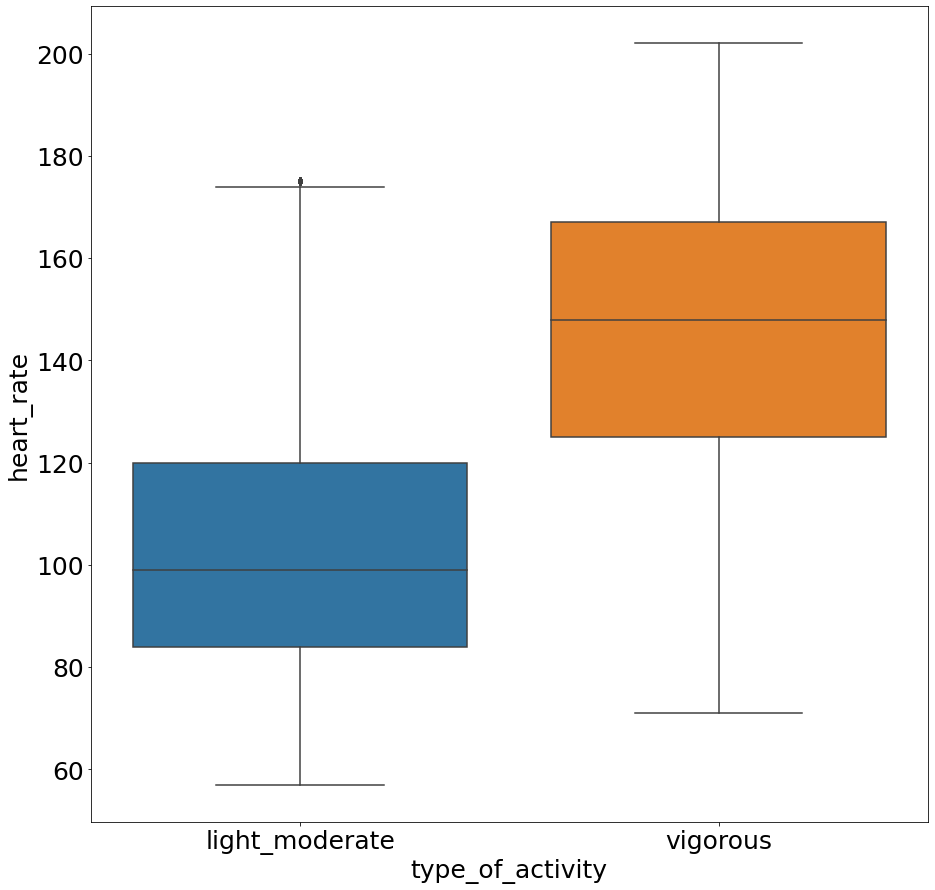

In [14]:
sns.boxplot(x='type_of_activity',y='heart_rate',data = organised_data) #boxplot of heart rate of 2 activity types

Calculation to see further details about box plot above will be construct. We will calculate the mean heart rate of both activities type and its standard deviation.

In [15]:
l_m_mean = organised_data[organised_data.type_of_activity == 'light_moderate'].heart_rate.mean()
l_m_std = organised_data[organised_data.type_of_activity == 'light_moderate'].heart_rate.std()
v_mean = organised_data[organised_data.type_of_activity == 'vigorous'].heart_rate.mean()
v_std = organised_data[organised_data.type_of_activity == 'vigorous'].heart_rate.std()
#find the mean ond standard deviation of heart rate in these 2 activity types
print('Mean Heart Rate for Light to Moderate Activities = ', l_m_mean)
print('Standard Deviation of Heart Rate for Light to Moderate Activities = ', l_m_std)
print('Mean Heart Rate for Vigorous Activities = ', v_mean)
print('Standard Deviation for Heart Rate for Vigorous Activities = ', v_std)

Mean Heart Rate for Light to Moderate Activities =  101.47460501767799
Standard Deviation of Heart Rate for Light to Moderate Activities =  21.690944167888226
Mean Heart Rate for Vigorous Activities =  145.5060148777896
Standard Deviation for Heart Rate for Vigorous Activities =  26.42709361520367


Box plot of heart rate on each individual activities will be plot to see the progression of heart rate of each activity.

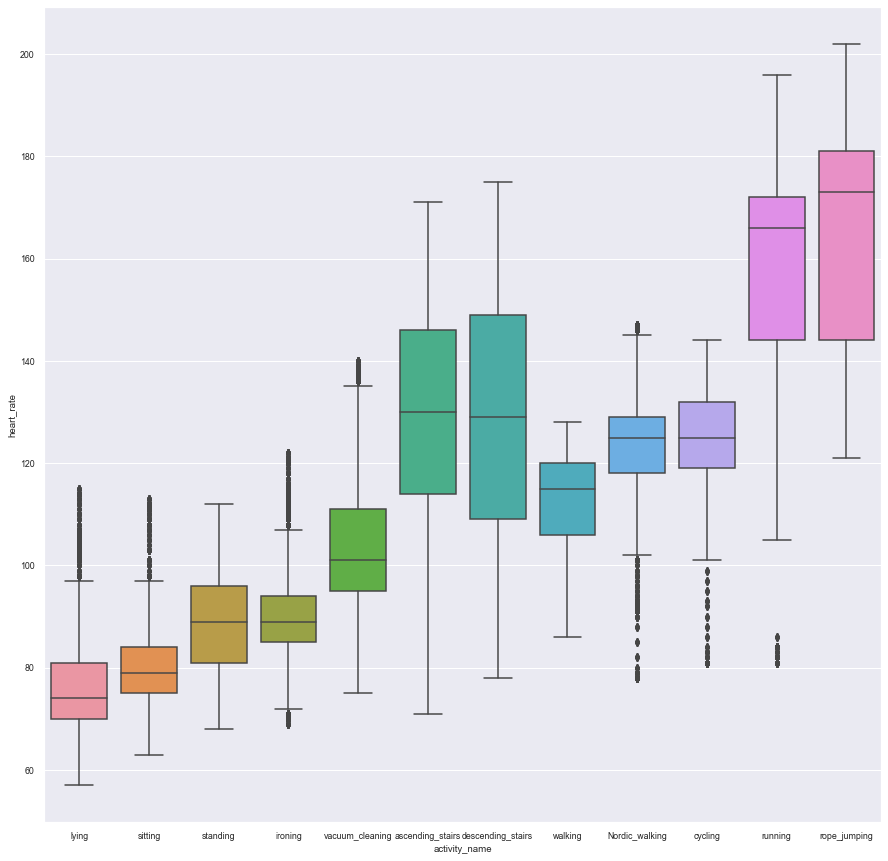

In [17]:
sns.boxplot(x='activity_name',y='heart_rate',data = organised_data)
sns.set(font_scale = 0.82) #boxplot

Furthermore, we will see the temperature from 3 sources: hand temperature, chest temperature and ankle temperature, for each activity.

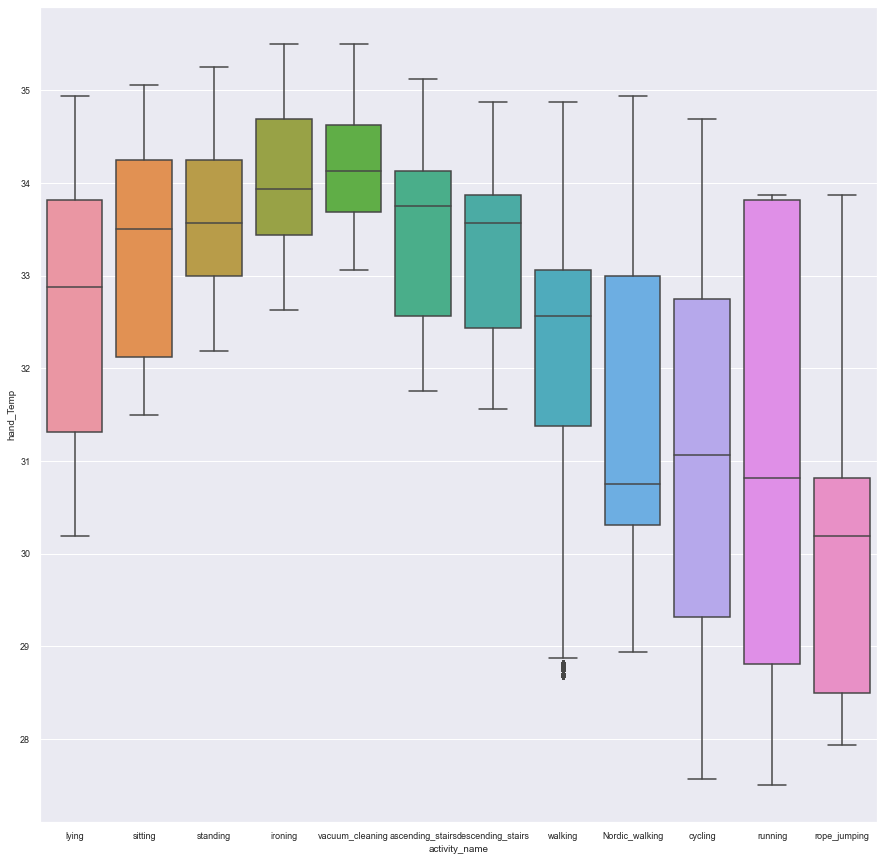

In [18]:
sns.boxplot(x='activity_name',y='hand_Temp',data = organised_data)
sns.set(font_scale = 0.82) #boxplot

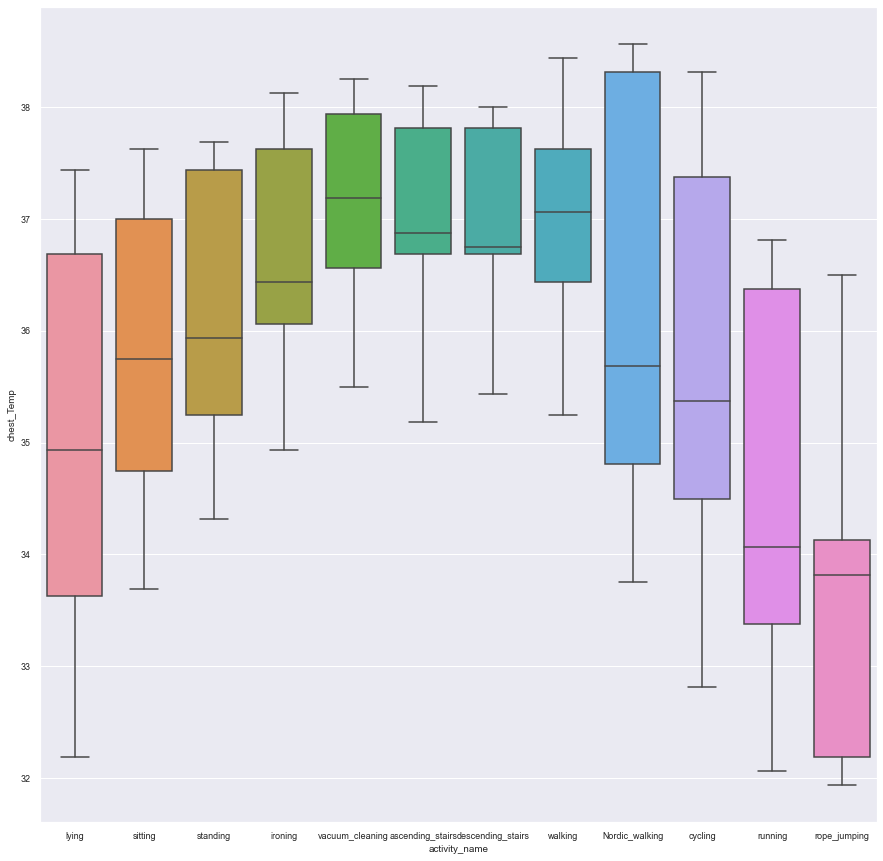

In [19]:
sns.boxplot(x='activity_name',y='chest_Temp',data = organised_data)
sns.set(font_scale = 0.82) #boxplot

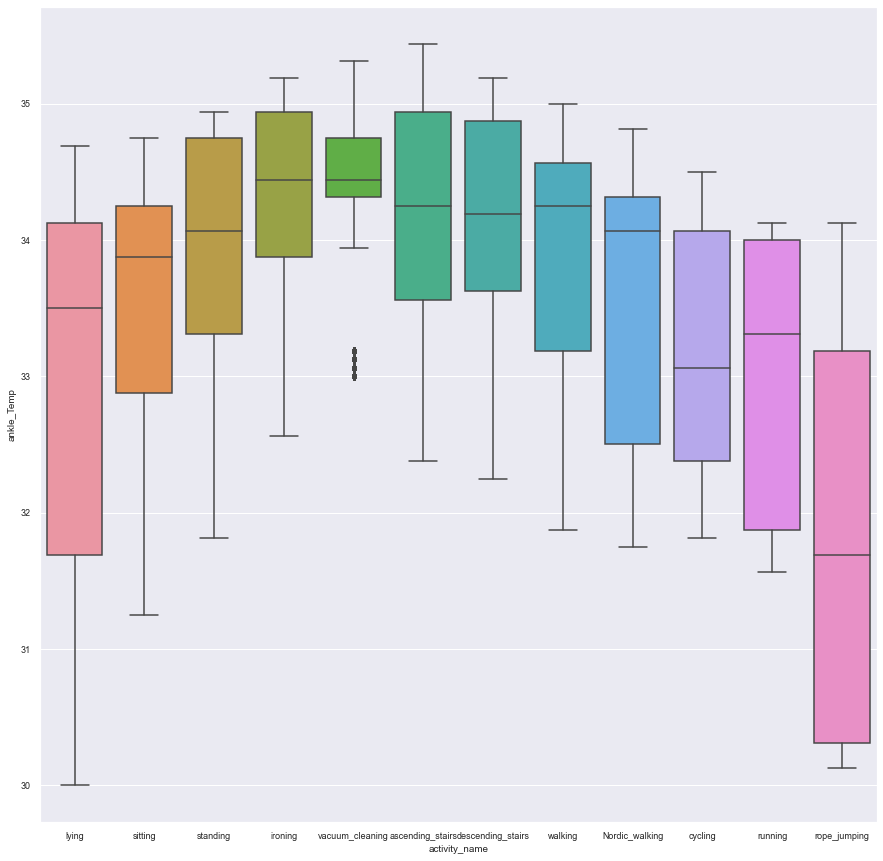

In [20]:
sns.boxplot(x='activity_name',y='ankle_Temp',data = organised_data)
sns.set(font_scale = 0.82) #boxplot

For more details, we then construct a calculation to find the mean of heart rate from hand, chest and ankle for each activity.

In [21]:
lying_mean = organised_data[organised_data.activity_name == 'lying'].heart_rate.mean()
sitting_mean = organised_data[organised_data.activity_name == 'sitting'].heart_rate.mean()
standing_mean = organised_data[organised_data.activity_name == 'standing'].heart_rate.mean()
ironing_mean = organised_data[organised_data.activity_name == 'ironing'].heart_rate.mean()
vacuum_cleaning_mean = organised_data[organised_data.activity_name == 'vacuum_cleaning'].heart_rate.mean()
ascending_mean = organised_data[organised_data.activity_name == 'ascending_stairs'].heart_rate.mean()
descending_mean = organised_data[organised_data.activity_name == 'descending_stairs'].heart_rate.mean()
walking_mean = organised_data[organised_data.activity_name == 'walking'].heart_rate.mean()
Nordic_walking_mean = organised_data[organised_data.activity_name == 'Nordic_walking'].heart_rate.mean()
cycling_mean = organised_data[organised_data.activity_name == 'cycling'].heart_rate.mean()
running_mean = organised_data[organised_data.activity_name == 'running'].heart_rate.mean()
rope_jumping_mean = organised_data[organised_data.activity_name == 'rope_jumping'].heart_rate.mean()
#find mean heart rate of each activity individually
print('Mean Heart Rate for Lying = ', lying_mean)
print('Mean Heart Rate for Sitting = ', sitting_mean)
print('Mean Heart Rate for Standing = ', standing_mean)
print('Mean Heart Rate for Ironing = ', ironing_mean)
print('Mean Heart Rate for Vacuum Cleaning = ', vacuum_cleaning_mean)
print('Mean Heart Rate for Ascending Stairs = ', ascending_mean)
print('Mean Heart Rate for Descending Stairs = ', descending_mean)
print('Mean Heart Rate for Walking = ', walking_mean)
print('Mean Heart Rate for Nodic Walking = ', Nordic_walking_mean)
print('Mean Heart Rate for Cycling = ', cycling_mean)
print('Mean Heart Rate for Running = ', running_mean)
print('Mean Heart Rate for Rope Jumping = ', rope_jumping_mean)

Mean Heart Rate for Lying =  75.53568181818181
Mean Heart Rate for Sitting =  80.01258195995038
Mean Heart Rate for Standing =  88.55763688760807
Mean Heart Rate for Ironing =  90.06959118052366
Mean Heart Rate for Vacuum Cleaning =  104.1980908410282
Mean Heart Rate for Ascending Stairs =  129.52348491922683
Mean Heart Rate for Descending Stairs =  129.15417491921193
Mean Heart Rate for Walking =  112.78986505095016
Mean Heart Rate for Nodic Walking =  123.82870101174555
Mean Heart Rate for Cycling =  124.8799521403882
Mean Heart Rate for Running =  156.59581411049848
Mean Heart Rate for Rope Jumping =  163.98447442097225


Next, we will see accelaration data, gyroscope data and magnometer data in three dimension graph. Firstly, we will plot hand data from accelerometer, chest data from accelerometer and ankle data from accelerometer altogether.

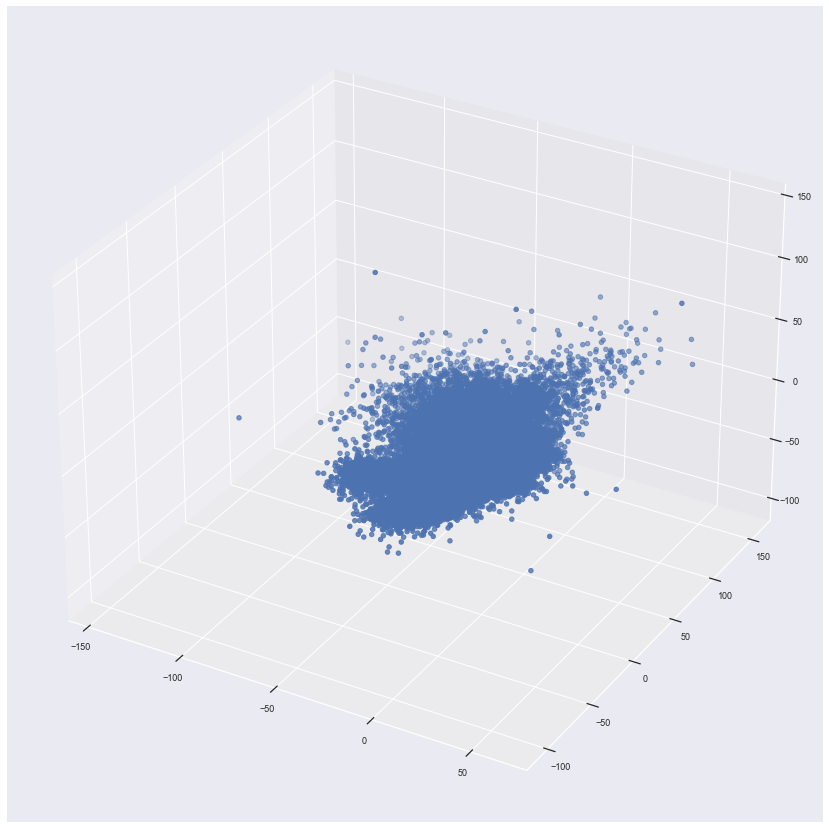

In [22]:
# Acceleration data for three-dimensional scattered points
data_hand_a = organised_data[[i for i in organised_data.columns if 'hand_a' in i and 'Temp' not in i]]
data_chest_a = organised_data[[i for i in organised_data.columns if 'chest_a' in i and 'Temp' not in i]]
data_ankle_a =organised_data[[i for i in organised_data.columns if 'ankle_a' in i and 'Temp' not in i]]
xdata_a = data_hand_a[data_hand_a.columns[0]]
ydata_a = data_hand_a[data_hand_a.columns[1]]
zdata_a = data_hand_a[data_hand_a.columns[2]]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
rcParams['figure.figsize'] = 15,15

ax.scatter(xdata_a, ydata_a, zdata_a, cmap='blue');

In [22]:
data_hand_a.head(3), data_chest_a.head(3), data_ankle_a.head(3) #validation of acceleration data

(      hand_a_16_x  hand_a_16_y  hand_a_16_z
 2928      2.21530      8.27915      5.58753
 2929      2.29196      7.67288      5.74467
 2930      2.29090      7.14240      5.82342,
       chest_a_16_x  chest_a_16_y  chest_a_16_z
 2928      0.124482       9.65003      -1.65181
 2929      0.200711       9.64980      -1.65043
 2930      0.270277       9.72331      -1.88174,
       ankle_a_16_x  ankle_a_16_y  ankle_a_16_z
 2928       9.73855      -1.84761      0.095156
 2929       9.69762      -1.88438     -0.020804
 2930       9.69633      -1.92203     -0.059173)

Secondly, we will plot hand data from gyrocope, chest data from gyrocope and ankle data from gyrocope altogether.

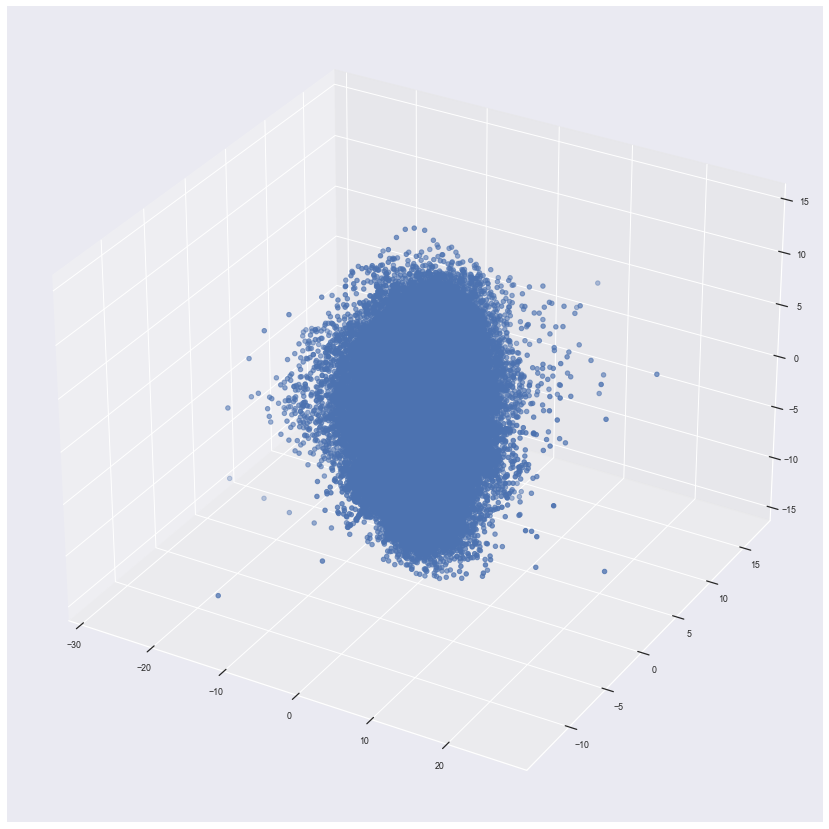

In [23]:
# Gyrocrope data for three-dimensional scattered points
data_hand_Gy = organised_data[[i for i in organised_data.columns if 'hand_Gy' in i and 'Temp' not in i]]
data_chest_Gy = organised_data[[i for i in organised_data.columns if 'chest_Gy' in i and 'Temp' not in i]]
data_ankle_Gy = organised_data[[i for i in organised_data.columns if 'ankle_Gy' in i and 'Temp' not in i]]
xdata_Gy = data_hand_Gy[data_hand_Gy.columns[0]]
ydata_Gy = data_hand_Gy[data_hand_Gy.columns[1]]
zdata_Gy = data_hand_Gy[data_hand_Gy.columns[2]]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
rcParams['figure.figsize'] = 15,15

ax.scatter(xdata_Gy, ydata_Gy, zdata_Gy, cmap='blue');

In [24]:
data_hand_Gy.head(3), data_chest_Gy.head(3), data_ankle_Gy.head(3) #validation of gyrocope data

(      hand_Gy_x  hand_Gy_y  hand_Gy_z
 2928  -0.004750   0.037579  -0.011145
 2929  -0.171710   0.025479  -0.009538
 2930  -0.238241   0.011214   0.000831,
       chest_Gy_x  chest_Gy_y  chest_Gy_z
 2928    0.036668    0.016559   -0.052791
 2929    0.019343   -0.024304   -0.059843
 2930   -0.001428    0.038466   -0.046464,
       ankle_Gy_x  ankle_Gy_y  ankle_Gy_z
 2928    0.002908   -0.027714    0.001752
 2929    0.020882    0.000945    0.006007
 2930   -0.035392   -0.052422   -0.004882)

Lastly, we will plot hand data from magnometer, chest data from magnometer and ankle data from magnometer altogether.

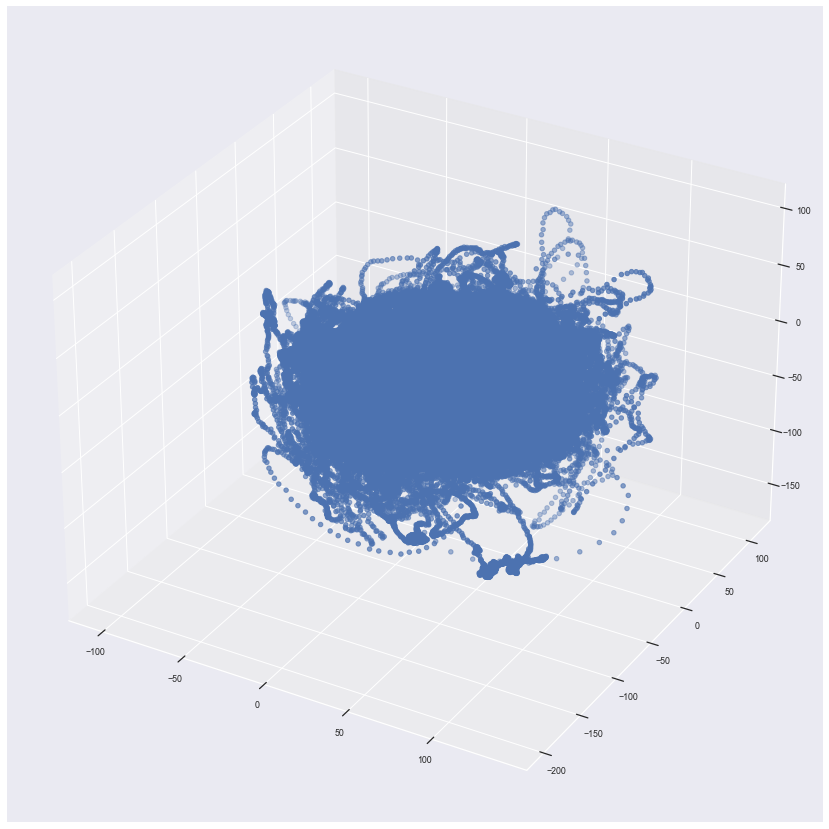

In [126]:
# Magnometer data for three-dimensional scattered points
data_hand_Mag = organised_data[[i for i in organised_data.columns if 'hand_Mag' in i and 'Temp' not in i]]
data_chest_Mag = organised_data[[i for i in organised_data.columns if 'chest_Mag' in i and 'Temp' not in i]]
data_ankle_Mag = organised_data[[i for i in organised_data.columns if 'ankle_Mag' in i and 'Temp' not in i]]
xdata_Mag = data_hand_Mag[data_hand_Mag.columns[0]]
ydata_Mag = data_hand_Mag[data_hand_Mag.columns[1]]
zdata_Mag = data_hand_Mag[data_hand_Mag.columns[2]]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
rcParams['figure.figsize'] = 15,15

ax.scatter(xdata_Mag, ydata_Mag, zdata_Mag, cmap='blue');

In [26]:
data_hand_Mag.head(3), data_chest_Mag.head(3), data_ankle_Mag.head(3) #validation of magnometer data

(      hand_Mag_x  hand_Mag_y  hand_Mag_z
 2928     8.93200    -67.9326    -19.9755
 2929     9.58300    -67.9584    -20.9091
 2930     9.05516    -67.4017    -19.5083,
       chest_Mag_x  chest_Mag_y  chest_Mag_z
 2928     0.567566     -50.7269      44.2728
 2929     0.904990     -50.5080      43.5427
 2930     0.455480     -50.7209      44.0259,
       ankle_Mag_x  ankle_Mag_y  ankle_Mag_z
 2928     -61.1081     -36.8636     -58.3696
 2929     -60.8916     -36.3197     -58.3656
 2930     -60.3407     -35.7842     -58.6119)

## Hypothesis Testing

Hypothesis testing is a test an assumption regarding a population parameter based on the nature and reason for the analysis. The goal of providing evidence on the plausibility of the null hypothesis. Statistical analysts test a hypothesis by measuring and examining a random sample of the population being analyzed. All analysts use a random population sample to test two different hypotheses: the null hypothesis and the alternative hypothesis.

#### Hypothesis 1

H0(Null): Heart rate of activities in light to moderate activities are higher than vigorous activities. \
H1(Alternate): Heart rate of vigorous activities are higher than light to moderate activities.

Hypothesis testing is set to test whether the heart rate in light to moderate activities are higher than in vigorous activities. Null hypothesis is to be accepted if light to moderate activities' heart rate are higher than vigorous. Reject the null hypothesis if the heart rate of vigourous activities are higher than light to moderate activities.

In [11]:
HR_ACT1 = organised_data[organised_data.type_of_activity=='vigorous'].heart_rate.dropna()
HR_ACT2 = organised_data[organised_data.type_of_activity=='light_moderate'].heart_rate.dropna()

In [57]:
HR_ACT1 #vigorous activities' heart rate

154285     124.0
154296     123.0
154307     123.0
154318     123.0
154329     123.0
           ...  
2844225    201.0
2844236    201.0
2844250    201.0
2844258    201.0
2844269    201.0
Name: heart_rate, Length: 23525, dtype: float64

In [12]:
HR_ACT2 #light to moderate activities'heart rate

2932       100.0
2943       100.0
2954       100.0
2965       100.0
2976       101.0
           ...  
2796295    122.0
2796306    122.0
2796317    122.0
2796328    122.0
2796339    122.0
Name: heart_rate, Length: 153298, dtype: float64

In [13]:
ttest_ind(HR_ACT1, HR_ACT2) #t-test

Ttest_indResult(statistic=280.9876808667188, pvalue=0.0)

In [59]:
ztest ,pval = stests.ztest(x1 = HR_ACT1, x2 = HR_ACT2) #z-test
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


Reject the null hypothesis because p value of heart rate data from vigorous activities and light to moderate activities are less than 0.05.

#### Hypothesis 2

H0(Null): Heart rate and temperature show no correlation \
H1(Alternate): Heart rate and temperature shows negative or positive correlation

Hypothesis testing is set to test whether the heart rate and temperature move in positive correlation. Positive correlation means that one variable move in certain direction and one another also move in the same direction. Negative correlation will be otherwise. Degree of correlation will be observed by the magnitude of correlation. The higher the number, the more likely that variable one to move in the same direction in the same magnitude. In this test, null hypothesis will be accepted if heart rate and temperature show no correlation. However, if heart rate and temperature show positive correlation or negative correlation, null hypothesis will be rejected.

In [15]:
ffill_HR = organised_data.ffill()
corr_test = ffill_HR[['heart_rate','hand_Temp', 'chest_Temp', 'ankle_Temp']]
corr_test['mean_Temp'] = corr_test[['hand_Temp','chest_Temp','ankle_Temp']].mean(axis=1) #find mean temp from hand, chest and ankle
corr_test = corr_test[['heart_rate', 'mean_Temp']].dropna()
corr_test

,heart_rate,mean_Temp
2932,100.0,31.104167
2933,100.0,31.104167
2934,100.0,31.104167
2935,100.0,31.104167
2936,100.0,31.104167
...,...,...
2844273,201.0,32.229167
2844274,201.0,32.229167
2844275,201.0,32.229167
2844276,201.0,32.229167


In [16]:
len(corr_test)

1936477

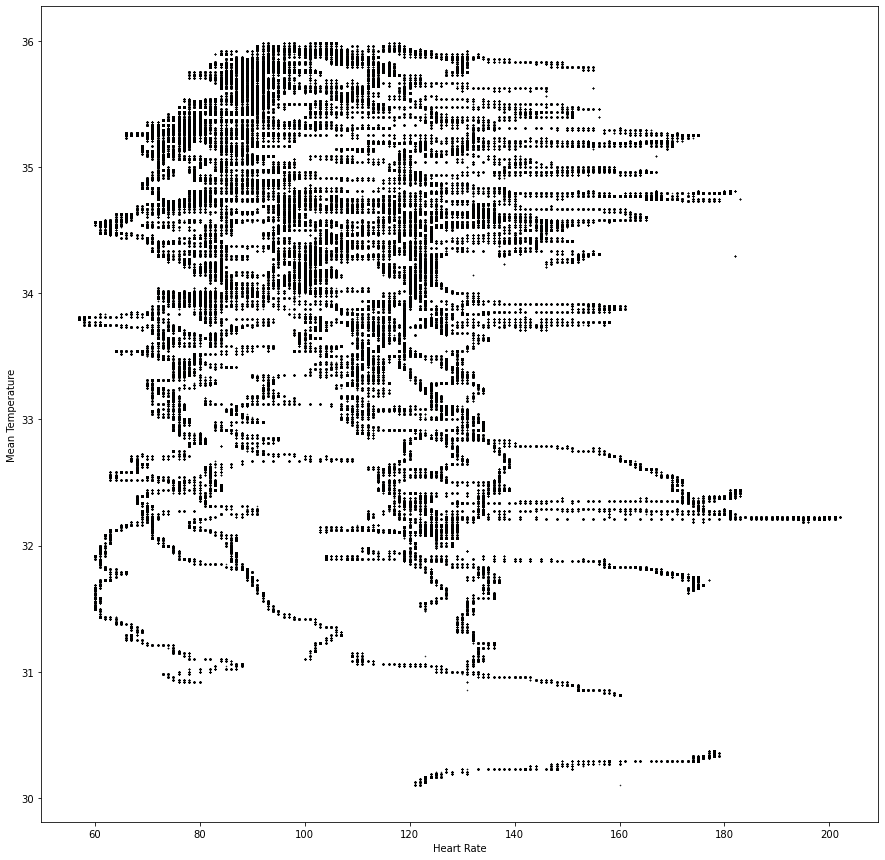

In [17]:
rcParams['figure.figsize'] = 15,15

plt.scatter(corr_test.heart_rate, corr_test.mean_Temp, marker = ".", edgecolors = "Black", s = 1)
plt.xlabel('Heart Rate')
plt.ylabel('Mean Temperature')
plt.show() #scatter plot

In [18]:
stats.pearsonr(corr_test['heart_rate'], corr_test['mean_Temp']) #correlation

(-0.24290459623145488, 0.0)

In [60]:
cormat = corr_test.corr()
round(cormat,4) #correlation matrix

,heart_rate,mean_Temp
heart_rate,1.0000,-0.2429
mean_Temp,-0.2429,1.0000


In [19]:
ztest ,pval = stests.ztest(x1 = corr_test['heart_rate'], x2 = corr_test['mean_Temp'], value=1936477, alternative = 'two-sided') #z-test
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


Reject Null Hypothesis becuase between heart rate and mean temperature, there is correlation between them. A negative correlation of -0.24290459623145488 or approximately -0.243. And, p value is less than 0.05.

## Modelling

For data modelling, in order to construct the model, we will need to replace all of our NaNs with some value. The method chose to replace the values missing is forward fill (ffill()). Forward fill is chose because the different between the frequency of collection from IMUs and heart rate data. There will be approximately 10 IMUs data to 1 heart rate data. Therefore, forward fill will fill the data with the adjacent known value to the missing data.

In [20]:
ffill_data = organised_data.ffill(axis=None, inplace=False, limit=None, downcast=None) #forward fill
ffill_data

,subject_id,activity_name,heart_rate,time_stamp,hand_Temp,hand_a_16_x,hand_a_16_y,hand_a_16_z,hand_Gy_x,hand_Gy_y,...,ankle_a_16_x,ankle_a_16_y,ankle_a_16_z,ankle_Gy_x,ankle_Gy_y,ankle_Gy_z,ankle_Mag_x,ankle_Mag_y,ankle_Mag_z,type_of_activity
2928,1,lying,NaN,37.66,30.3750,2.21530,8.27915,5.58753,-0.004750,0.037579,...,9.73855,-1.847610,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,light_moderate
2929,1,lying,NaN,37.67,30.3750,2.29196,7.67288,5.74467,-0.171710,0.025479,...,9.69762,-1.884380,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,light_moderate
2930,1,lying,NaN,37.68,30.3750,2.29090,7.14240,5.82342,-0.238241,0.011214,...,9.69633,-1.922030,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,light_moderate
2931,1,lying,NaN,37.69,30.3750,2.21800,7.14365,5.89930,-0.192912,0.019053,...,9.66370,-1.847140,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,light_moderate
2932,1,lying,100.0,37.70,30.3750,2.30106,7.25857,6.09259,-0.069961,-0.018328,...,9.77578,-1.885820,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,light_moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844273,8,rope_jumping,201.0,3888.37,30.8125,-1.56754,-9.74184,-1.75943,-0.020359,-0.035195,...,9.11577,-0.294388,-3.664060,0.119553,-0.046894,-0.102102,-31.9957,13.2739,39.2913,vigorous
2844274,8,rope_jumping,201.0,3888.38,30.8125,-1.63804,-9.58850,-1.64554,-0.030335,-0.041118,...,9.15729,-0.143714,-3.548800,0.099501,-0.089781,-0.078137,-31.8664,13.2679,39.4336,vigorous
2844275,8,rope_jumping,201.0,3888.39,30.8125,-1.79054,-9.58767,-1.68632,-0.009027,-0.019017,...,9.33192,-0.217303,-3.971040,0.086514,-0.041586,-0.096625,-31.8711,13.2669,39.0081,vigorous
2844276,8,rope_jumping,201.0,3888.40,30.8125,-1.64687,-9.51497,-1.91533,-0.034688,-0.069075,...,9.22334,-0.141619,-3.856850,0.036153,-0.020759,-0.067416,-31.0895,12.5846,39.1535,vigorous


However, the first 4 slots are still NaNs because forward fill used previous data to fill the one adjacent to them in the earlier cell, but these 4 rows have NaN so the first 4 rows cannot be filled. Therefore, we will drop these 4 rows which has NaNs in heart rate.

In [ ]:
ffill_drop = ffill_data.dropna() #drop NaN
ffill_drop

In order to check the accuracy of data, len() will be used to see how many rows are dropped because of NaNs after the forward fill. Before we drop these 4 rows, we have 1,936,481 rows. And, after NaNs are dropped, we left with 1,936,477. Exactly 4 rows are gone, it proved that forward fill is doing the right task and no more than 4 rows are containing NaNs.

In [35]:
len(ffill_data)

1936481

In [36]:
len(ffill_drop)

1936477

We will create a data model by using Logistic Regression. However, before doing regression, we will need to define x inputs and y inputs. For x inputs: the column uses will be all of the column from forward filled and dropped data but disregard the activity name, time stamp, type of activity and subject id. Whereas, for y inputs: activity name column will be used.

In [22]:
le = LabelEncoder()

x = ffill_drop[set(ffill_drop.columns).difference(set(['activity_name','time_stamp','type_of_activity','subject_id']))]
y = le.fit_transform(ffill_drop['activity_name'])

After we have define the inputs for x and y variables, we will need to specify test size. In this case, we will use test size of 1/3 (33%).

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) #define test size

We then start to do logistic regression. Whereas, C is inverse of regularization strength: applying a penalty to increase the magnitude to reduce overfitting. Minimizing the error between what the model is predicting from dependent variable. Although, the model is tailored to the parameter values to idiosyncrasies in this dataset, still idiosyncrasies do not appear in future data, therefore we will get poor prediction. In order to subside this error, we will need to add another variable to the equation: Lambda (λ). The larger λ is the less likely it is that the parameters will be increased in magnitude simply to adjust for small perturbations in the data. In your case however, rather than specifying λ, you specify C=1/λ.

In [44]:
lr = LogisticRegression(solver = 'saga', random_state = 30, C = 2.0) #define inverse of regularization strength
lr.fit(x_train,y_train)
accuracy_score(y_test, lr.predict(x_test))

0.7994798431392186

Defining λ.

In [25]:
lam_score = dict()
for lam in np.arange (0.1, 1.1, 0.1):
    lr = LogisticRegression(solver = 'saga', random_state = 30, C = 1/lam) #define C = 1/lam
    
    lr.fit(x_train, y_train)
    lam_score[lam] = accuracy_score(y_test, lr.predict(x_test))
    print(f"Lambda value: {lam}")

Lambda value: 0.1
Lambda value: 0.2
Lambda value: 0.30000000000000004
Lambda value: 0.4
Lambda value: 0.5
Lambda value: 0.6
Lambda value: 0.7000000000000001
Lambda value: 0.8
Lambda value: 0.9
Lambda value: 1.0


λ value set to use in this observation will be 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 and 1.0.

In [26]:
print(lam_score) #lamdba score 0.1, ... , 1.0

{0.1: 0.7994861025478923, 0.2: 0.7994829728435555, 0.30000000000000004: 0.7994829728435555, 0.4: 0.799481407991387, 0.5: 0.7994798431392186, 0.6: 0.799481407991387, 0.7000000000000001: 0.7994845376957239, 0.8: 0.7994845376957239, 0.9: 0.7994845376957239, 1.0: 0.7994829728435555}


Here is the accuracy score contribute to each λ value. And, the result suggested that the highest accuracy score is come from Lambda 0.1.

In [49]:
accuracy_table = [['Lambda', 'Accuracy Score'], ['0.1', '0.7994861025478923'], ['0.2', '0.7994829728435555'], ['0.3', '0.7994829728435555'], 
                  ['0.4', '0.799481407991387'], ['0.5', '0.7994798431392186'], ['0.6', '0.799481407991387'], ['0.7', '0.7994845376957239'], 
                  ['0.8', '0.7994845376957239'], ['0.9', '0.7994845376957239'], ['1.0', '0.7994829728435555']]

print(tabulate(accuracy_table, headers='firstrow', tablefmt='fancy_grid')) #lamda accuracy table

╒══════════╤══════════════════╕
│   Lambda │   Accuracy Score │
╞══════════╪══════════════════╡
│      0.1 │         0.799486 │
├──────────┼──────────────────┤
│      0.2 │         0.799483 │
├──────────┼──────────────────┤
│      0.3 │         0.799483 │
├──────────┼──────────────────┤
│      0.4 │         0.799481 │
├──────────┼──────────────────┤
│      0.5 │         0.79948  │
├──────────┼──────────────────┤
│      0.6 │         0.799481 │
├──────────┼──────────────────┤
│      0.7 │         0.799485 │
├──────────┼──────────────────┤
│      0.8 │         0.799485 │
├──────────┼──────────────────┤
│      0.9 │         0.799485 │
├──────────┼──────────────────┤
│      1   │         0.799483 │
╘══════════╧══════════════════╛


The accuracy score of y prediction given x is 0.7994829728435555 or 79.95% accuracy.

In [28]:
accuracy_score(y_test, lr.predict(x_test)) #prediction model

0.7994829728435555

Log Loss is the most important classification metric based on probabilities. It’s hard to interpret raw log-loss values, but log-loss is still a good metric for comparing models. For any given problem, a lower log loss value means better predictions. Log Loss is the negative average of the log of corrected predicted probabilities for each instance. And, log loss for train model is 0.6402352141621613 or 64.02%.

In [29]:
print(log_loss(y_train, lr.predict_proba(x_train))) #log loss train

0.6402352141621613


Log loss for test model is 0.6390966366260046 or 63.91%.

In [30]:
print(log_loss(y_test,lr.predict_proba(x_test))) #log loss test

0.6390966366260046


Let us take a look at our classification report for more detail on F1 score.

In [51]:
print(classification_report(y_test, lr.predict(x_test))) #classification report

              precision    recall  f1-score   support

           0       0.72      0.73      0.73     62208
           1       0.58      0.53      0.55     38583
           2       0.91      0.93      0.92     54387
           3       0.52      0.41      0.46     34597
           4       0.86      0.89      0.88     78944
           5       0.95      0.96      0.96     63463
           6       0.72      0.59      0.65     14152
           7       0.73      0.70      0.72     32616
           8       0.87      0.86      0.86     60977
           9       0.81      0.83      0.82     62447
          10       0.80      0.79      0.80     57855
          11       0.77      0.85      0.81     78809

    accuracy                           0.80    639038
   macro avg       0.77      0.76      0.76    639038
weighted avg       0.79      0.80      0.80    639038



As you can see on the bar graph below, the best F1 score is given by C = 2.

<BarContainer object of 11 artists>

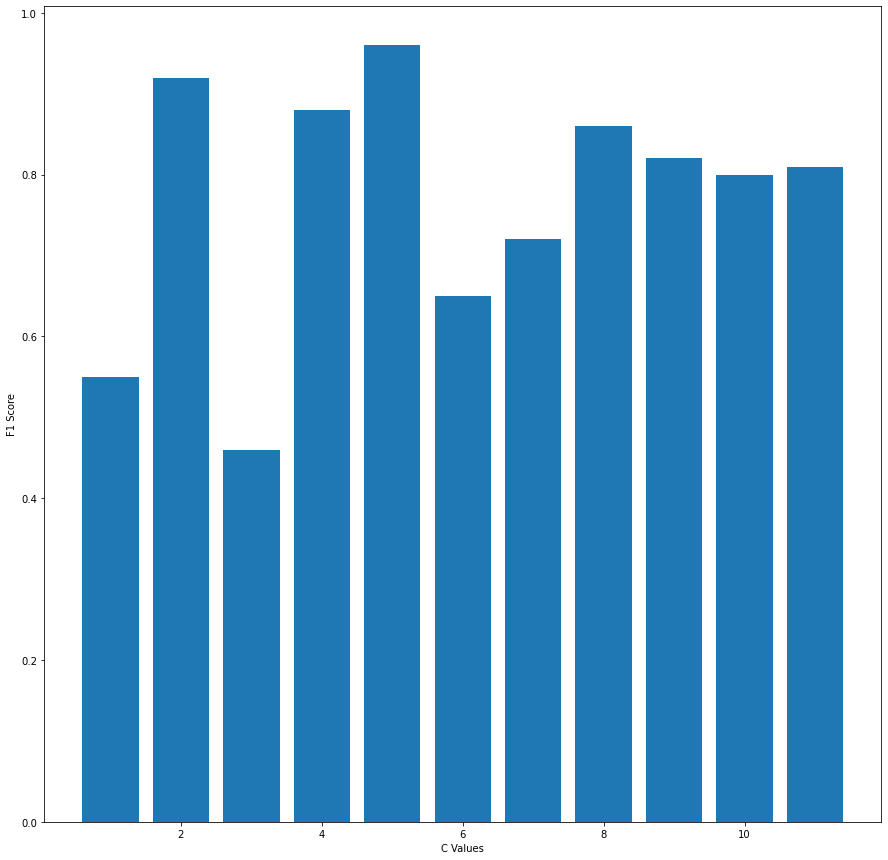

In [55]:
ylabel = (0.55, 0.92, 0.46, 0.88, 0.96, 0.65, 0.72, 0.86, 0.82, 0.80, 0.81)
xlabel = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
plt.xlabel('C Values')
plt.ylabel('F1 Score')
plt.bar(xlabel, ylabel) #bar plot of F1-value and C.

## Summary

In exploratory data analysis, we can conclude that heart rate of light to moderate activities (lying, sitting, standing, ironing, vacuum cleaning, descending stairs, walking, Nordic walking and cycling) and vigorous activity (ascending stairs, running and rope jumping) are decidedly distinctive. In addition, there are 3 source of temperature measuring units: hand, chest and ankle. There are noticeably difference between them. For example, mean lying hand temp = 32.8, mean lying chest temp = 34.9, mean lying ankle temperature = 33.5. Therefore, this information is unaccurate and need to find the mean between these 3 inputs. Mean temperature for each activity will be calculated in hypothesis testing section in pursue to find correlation between heart rate and mean temperature. Later in EDA, 3 dimensional data from accelerometer, gyposcope and magnometer were plotted.

Meanwhile, there are 2 hypothses to be tested in this report, one being test null hypothesis to see if heart rate from light to moderate activities are higher than vigorous activities, and alternative hypothesis is heart rate of vigorous activities are higher than light to moderate activities. And, result suggested that we should reject the null hypothesis because p-value is less than 0.05 and vigorous activities' heart rate are actually higher than light to moderate activities' heart rate. The second one being test null hypothsis to see if heart rate and mean temperature (from hand, chest and ankle) have no (zero) correlation, and alternative hypothesis is there are either positive or negative correlation between them. Result suggested that we should, again, reject the null hypothesis because there are negative correlation of -0.243 between mean temperature and heart rate. Plus, p-value is less than 0.05, and therefore reject the null hypothesis. 

Furthermore, we are constructing a test model to predict the activity name from the remaining data. Firstly, we split data to test at 33%, plus, use of logistic regression. Then, we mapped the use of C (inverse of regularization strength) and Lambda. We will test C 1 to C 11 and Lambda 0.1, 0.2, ... , 1.0 to see which one give a best prediction accuracy score. And, the best inverse of regularization strength to give the most accurate prediction is C = 5 in which accuracy score of 96% accuracy to predict the activity name. With Lambda being at 0.1 contributing accuracy score of approximately 79.95%. 

## References

UC Irvine Machine Learning Repository. PAMAP2 Physical Activity Monitoring Data Set (2012). Available at: http://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring (accessed 22nd December 2021)

A. Reiss and D. Stricker. Creating and Benchmarking a New Dataset for Physical Activity Monitoring. The 5th Workshop on ABRA (affect and Behaviour Related Assisstance) (2012). Available at: https://www.researchgate.net/publication/235348488_Creating_and_Benchmarking_a_New_Dataset_for_Physical_Activity_Monitoring (accessed 26th December 2021) 

Jake VanderPlas. Three-Dimensional Plotting in Matplotlib. Python Data Science Handbook (2016). Available at: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html (accessed 26th December 2021)

Scikit Learn. sklearn.model_selection.train_test_split. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html (accessed 26th December 2021)

Mito. Creating a Mitosheet (2021). Available at: https://docs.trymito.io/how-to/creating-a-mitosheet (accessed 26th December 2021)

Pandas. pandas.DataFrame.ffill. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html (accessed 26th December 2021)

Pandas. pandas.DataFrame.dropna. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html (accessed 26th December 2021)

Pandas. pandas.DataFrame.drop. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html (accessed 26th December 2021)

Jason Brownlee. 17 Statistical Hypothesis Tests in Python (Cheat Sheet) (2018). Available at: https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/ (accessed 27th December 2021)

Yogesh Agrawal. Hypothesis testing in Machine learning using Python (2019). Available at: https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce (accessed 27th December 2021)

Seaborn. Choosing Colour Palettes. Available at: https://seaborn.pydata.org/tutorial/color_palettes.html (accessed 28th December 2021)

Delftstack. Font Size in Seaborn Plot (2021). Available at: https://www.delftstack.com/howto/seaborn/seaborn-font-size/ (accessed 28th December 2021)

Seaborn. seaborn.heatmap. Available at:  https://seaborn.pydata.org/generated/seaborn.heatmap.html (accessed 29th December 2021)

Dan Nelson. Statistical Hypothesis Analysis in Python with ANOVAs, Chi-Square, and Pearson Correlation (2020). Available at:  https://stackabuse.com/statistical-hypothesis-analysis-in-python-with-anovas-chi-square-and-pearson-correlation/ (accessed 29th December 2021)

Jason Brownlee. How to Calculate Correlation Between Variables in Python (2018). Available at: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/ (accessed 29th December 2021)

Matplotlib. matplotlib.markers. Available at:  https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers (accessed 29th December 2021)

Matplotlib. matplotlib.pyplot.scatter. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html (accessed 29th December 2021)

Mirko Stojiljković. Linear Regression in Python. Available at: https://realpython.com/linear-regression-in-python/ (accessed 29th December 2021)

Tutorialpoints. Jupyter Notebook - Markdown Cells. Available at: https://www.tutorialspoint.com/jupyter/jupyter_notebook_markdown_cells.htm (accessed 29th December 2021)

Michael Brydon. Correlation and Scatterplots (2021). Available at: https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html (accessed 29th December 2021)

Yogesh Agrawal. Hypothesis testing in Machine learning using Python (2019). Available at: https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce (accessed 29th December 2021)

IBM Cloud Education. Exploratory Data Analysis (2020). Available at: https://www.ibm.com/uk-en/cloud/learn/exploratory-data-analysis (accessed 29th December 2021)

Christina Majaski. Hypothesis Testing (2021). Available at: https://www.investopedia.com/terms/h/hypothesistesting.asp#:~:text=Hypothesis%20testing%20is%20an%20act,assumption%20regarding%20a%20population%20parameter.&text=Hypothesis%20testing%20is%20used%20to,from%20a%20data%2Dgenerating%20process (accessed 30th December 2021)

Luay Matalka. How to Easily Create Tables in Python (2021). Available at: https://towardsdatascience.com/how-to-easily-create-tables-in-python-2eaea447d8fd (30th December 2021)

Samarth Agrawal. How to split data into three sets (train, validation, and test) And why? (2021). Available at: https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c (accessed 30th December 2021)